In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/CarPrice.csv")

In [4]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [5]:
df.shape

(205, 26)

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df.info()
# In ur case, u will hv int, float and datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.describe() # summary of all numeric cols

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [9]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [10]:
df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [11]:
def ass_symboling(x):
    if x==-2:
        return 'A'
    elif x==-1:
        return 'B'
    elif x==0:
        return 'C'
    elif x==1:
        return 'E'
    else:
        return 'F'
    
df['symboling'] = df['symboling'].apply(ass_symboling)

In [12]:
df.head()

car_ID symboling                   CarName fueltype aspiration doornumber  \
0       1         F        alfa-romero giulia      gas        std        two   
1       2         F       alfa-romero stelvio      gas        std        two   
2       3         E  alfa-romero Quadrifoglio      gas        std        two   
3       4         F               audi 100 ls      gas        std       four   
4       5         F                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [13]:
df.symboling.value_counts()

C    67
F    59
E    54
B    22
A     3
Name: symboling, dtype: int64

In [14]:
day = pd.read_csv('day.csv')
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [15]:
day.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [16]:
def object_map(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'
    })

day[['mnth']] = day[['mnth']].apply(object_map)

In [17]:
day.mnth.value_counts()

Dec    62
Jul    62
Oct    62
Jan    62
Mar    62
Aug    62
May    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [18]:
df.head()

car_ID symboling                   CarName fueltype aspiration doornumber  \
0       1         F        alfa-romero giulia      gas        std        two   
1       2         F       alfa-romero stelvio      gas        std        two   
2       3         E  alfa-romero Quadrifoglio      gas        std        two   
3       4         F               audi 100 ls      gas        std       four   
4       5         F                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [19]:
# Data Visualization: 

# distplot -> temp, atemp, hum, , windspeed, casual, registered, cnt -> Write ur insights

In [20]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

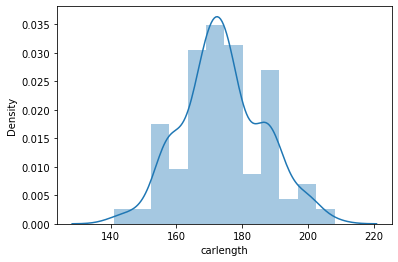

In [21]:
sns.distplot(df['carlength'])
plt.show();

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [23]:
# Find all the categorical variables in the dataset

df_categorical = df.select_dtypes(exclude=['float64','datetime64','int64'])
df_categorical.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [24]:
len(df_categorical.columns)
# In ur data, you will get this answer as 7

11

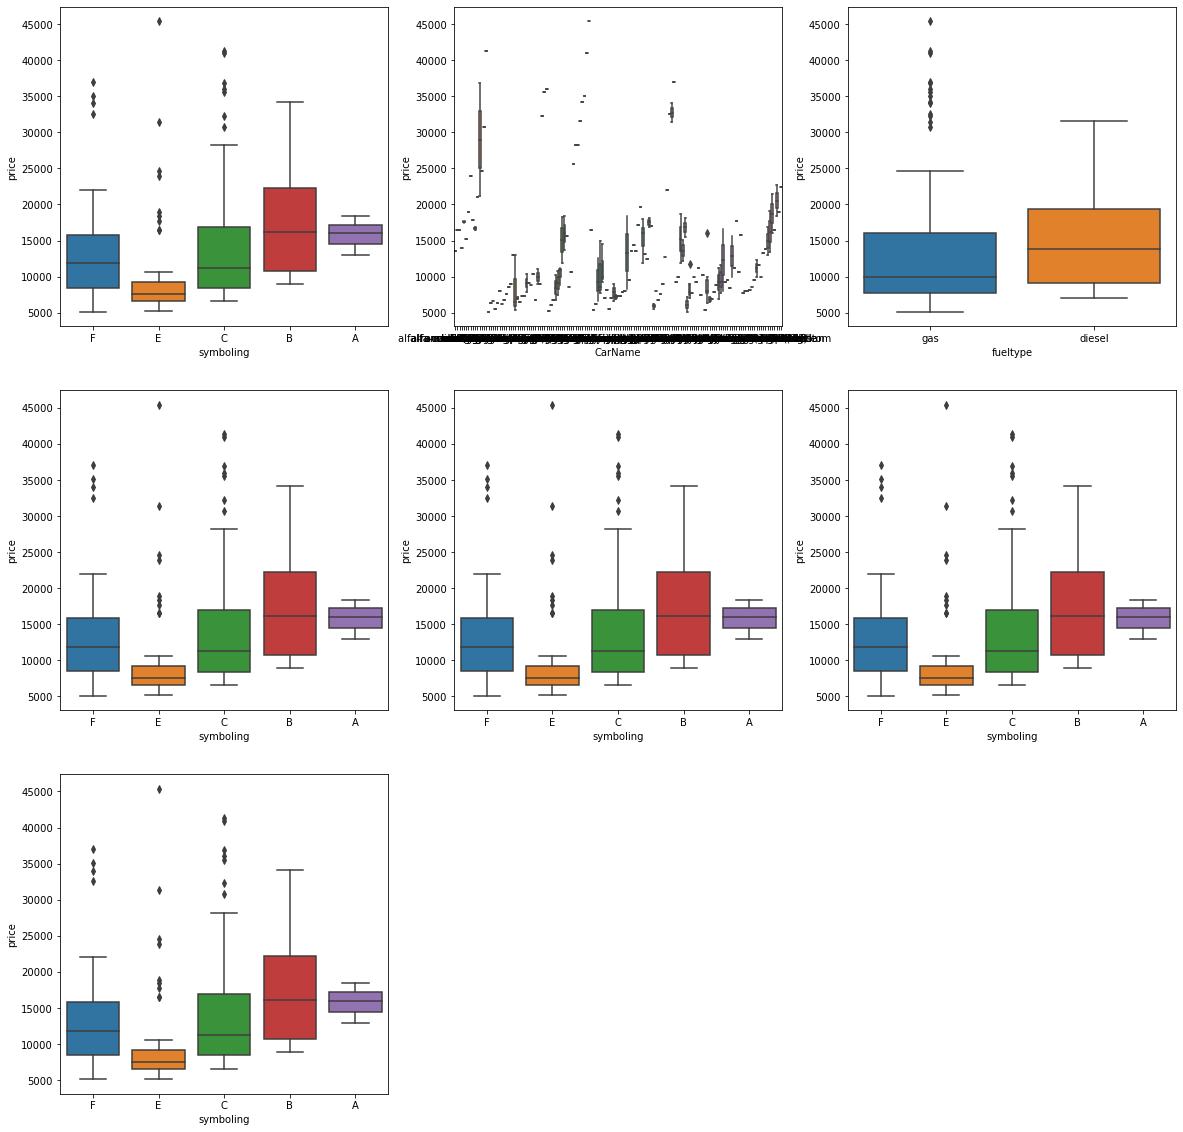

In [25]:
# Visualizing Categorical Variables -> BoxPlot.......You can use any other plot as well as there are no 
# such constraints mentioned in the problem statement
# In your case, y='cnt', x will be all the categorical variables

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='symboling', y='price', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='CarName', y='price', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='fueltype', y='price', data=df)
# do substitute accordingly
plt.subplot(3,3,4)
sns.boxplot(x='symboling', y='price', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='symboling', y='price', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='symboling', y='price', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='symboling', y='price', data=df)
plt.show();

In [26]:
# Visualize Numerical cols

df.describe() # describe gives all numerical cols summary

car_ID   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000   98.756585  174.049268   65.907805   53.724878   
std     59.322565    6.021776   12.337289    2.145204    2.443522   
min      1.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [27]:
# Visualize Numerical cols

df.describe().columns

# In ur case, u will get temp	atemp	hum	windspeed	casual	registered	cnt

Index(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [28]:
df[['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']].head()

car_ID  wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       1       88.6      168.8      64.1       48.8        2548         130   
1       2       88.6      168.8      64.1       48.8        2548         130   
2       3       94.5      171.2      65.5       52.4        2823         152   
3       4       99.8      176.6      66.2       54.3        2337         109   
4       5       99.4      176.6      66.4       54.3        2824         136   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [32]:
df.head()

car_ID symboling                   CarName fueltype aspiration doornumber  \
0       1         F        alfa-romero giulia      gas        std        two   
1       2         F       alfa-romero stelvio      gas        std        two   
2       3         E  alfa-romero Quadrifoglio      gas        std        two   
3       4         F               audi 100 ls      gas        std       four   
4       5         F                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [36]:
df[['compressionratio']] = df[['compressionratio']].astype(int)

In [37]:
df[['compressionratio']] = df[['compressionratio']].astype(float)

In [29]:
df[['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.1 KB


In [30]:
IntVariableList = ['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

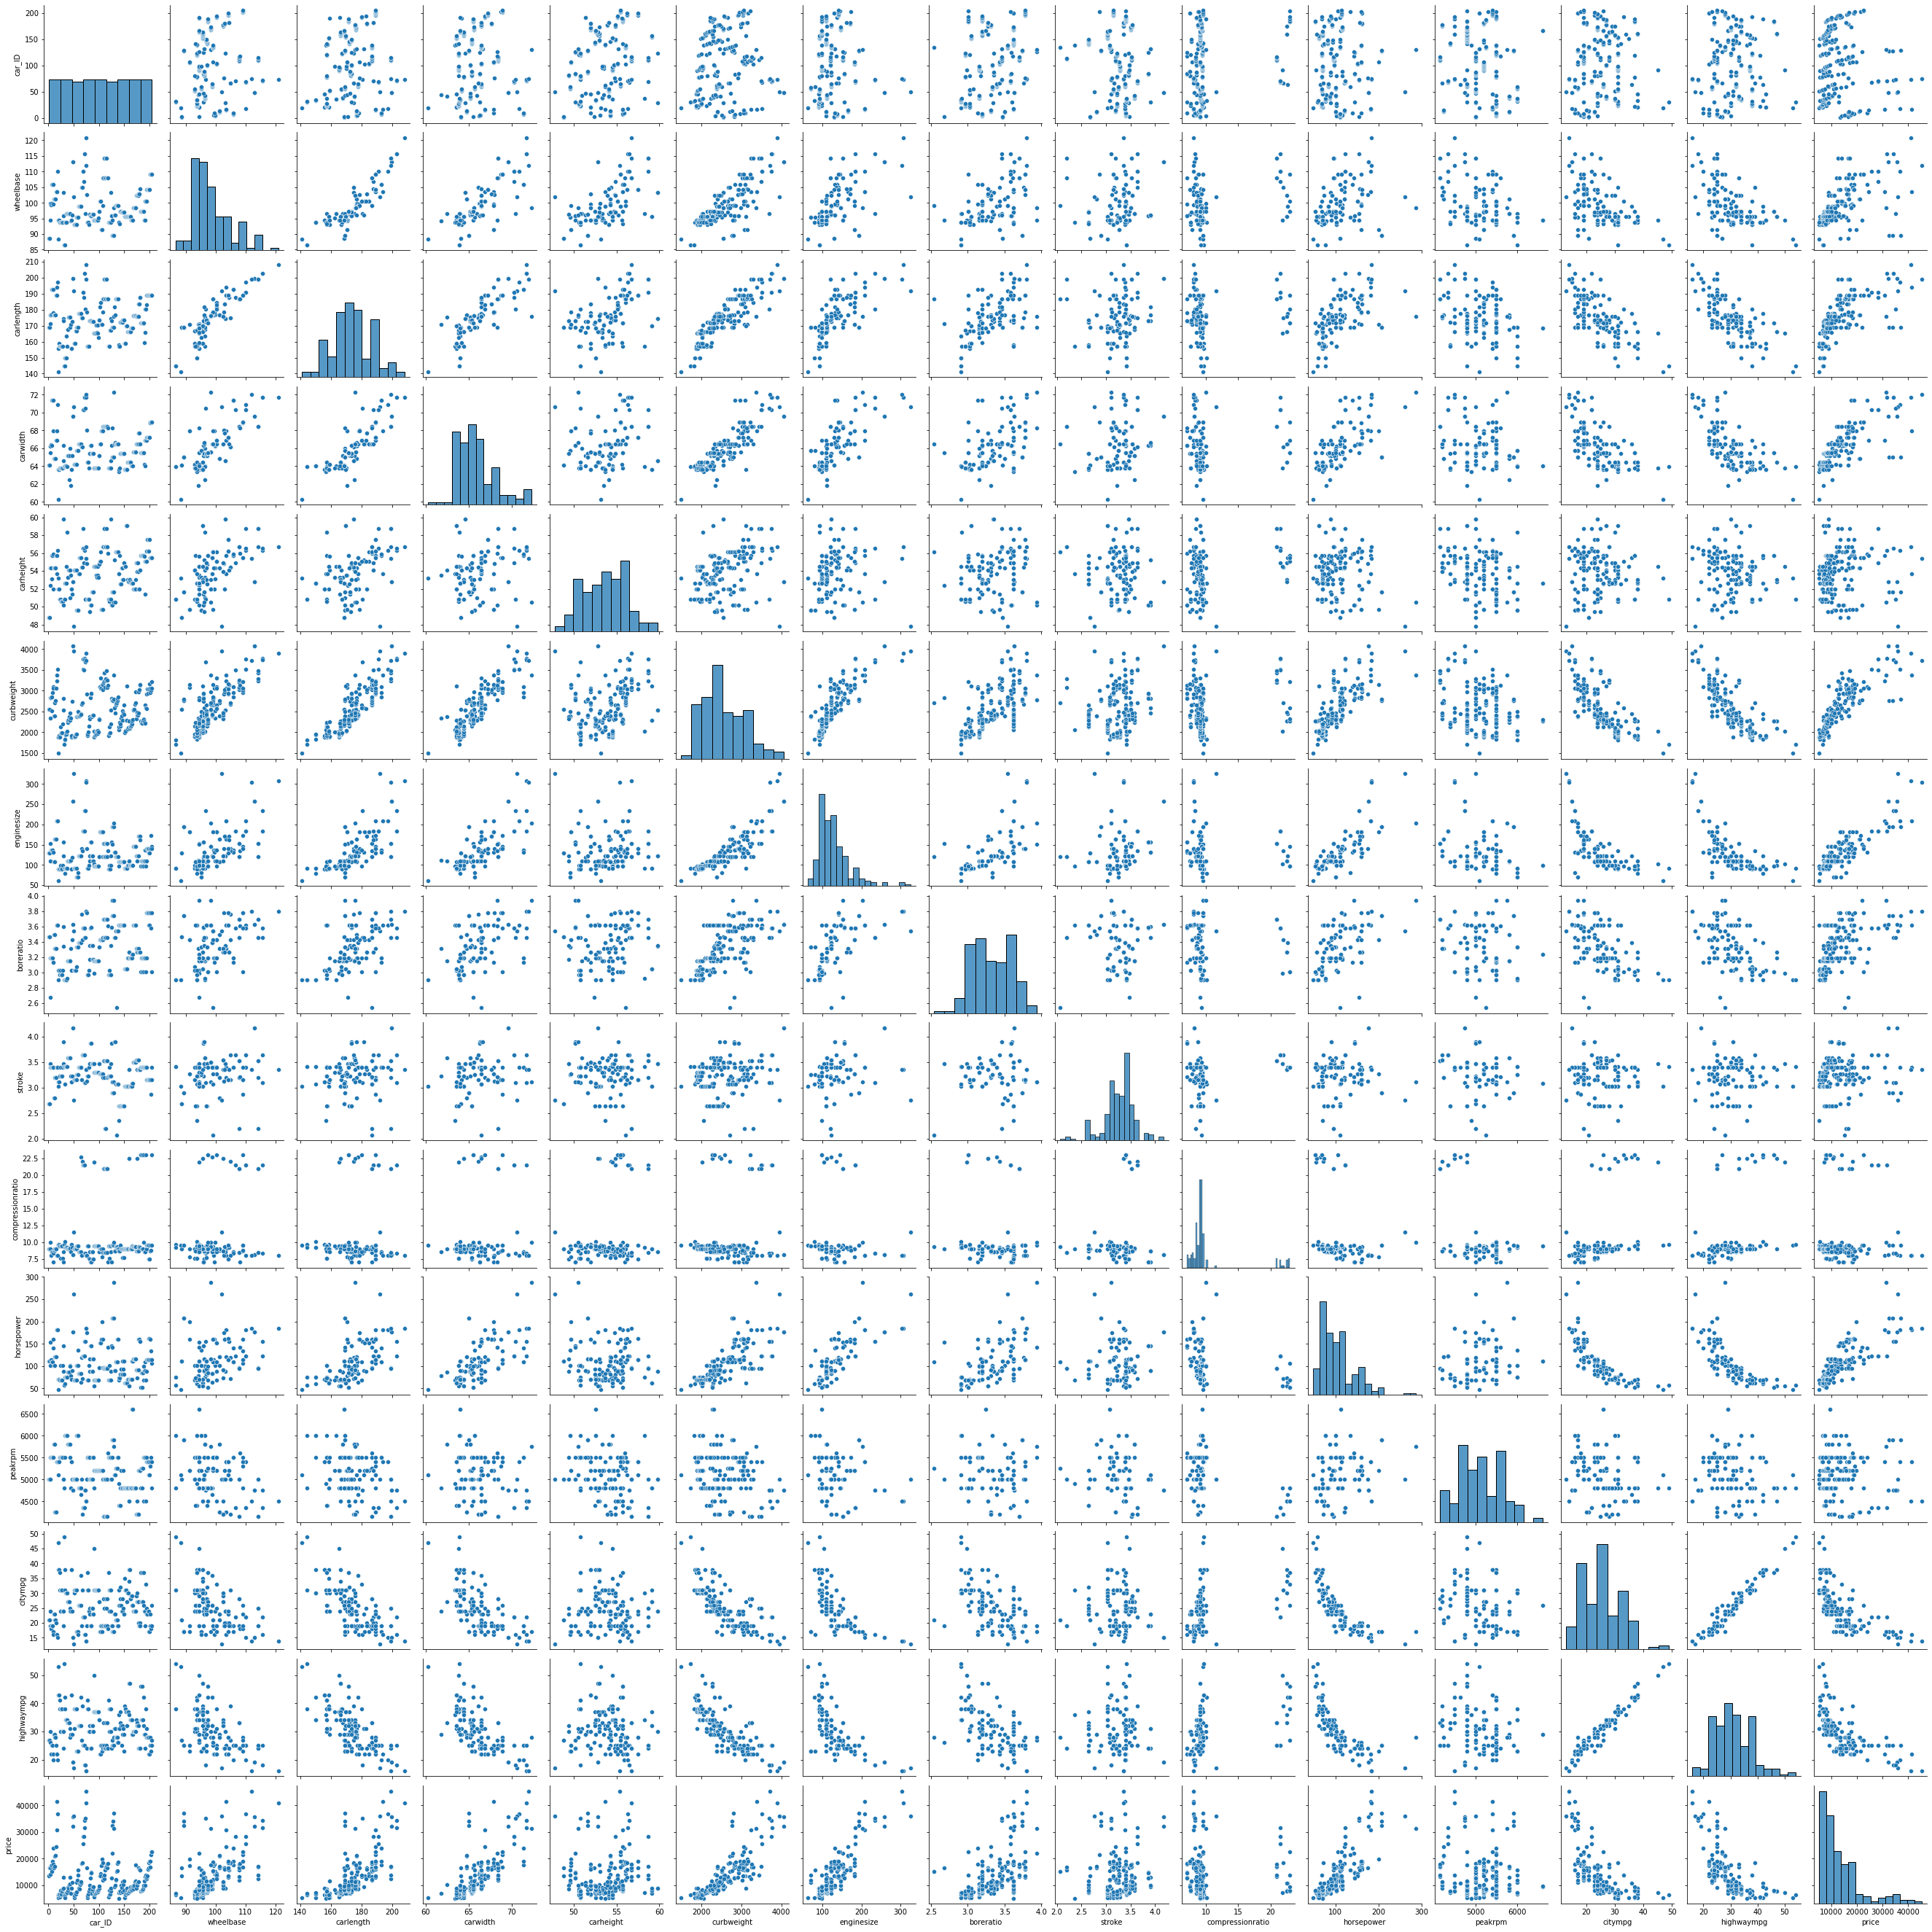

In [31]:
sns.pairplot(df[IntVariableList])
plt.show();

In [39]:
cor = df[['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']].corr()

cor

car_ID  wheelbase  carlength  carwidth  carheight  \
car_ID            1.000000   0.129729   0.170636  0.052387   0.255960   
wheelbase         0.129729   1.000000   0.874587  0.795144   0.589435   
carlength         0.170636   0.874587   1.000000  0.841118   0.491029   
carwidth          0.052387   0.795144   0.841118  1.000000   0.279210   
carheight         0.255960   0.589435   0.491029  0.279210   1.000000   
curbweight        0.071962   0.776386   0.877728  0.867032   0.295572   
enginesize       -0.033930   0.569329   0.683360  0.735433   0.067149   
boreratio         0.260064   0.488750   0.606454  0.559150   0.171071   
stroke           -0.160824   0.160959   0.129533  0.182942  -0.055307   
compressionratio  0.147478   0.251752   0.163499  0.183043   0.265901   
horsepower       -0.015006   0.353294   0.552623  0.640732  -0.108802   
peakrpm          -0.203789  -0.360469  -0.287242 -0.220012  -0.320411   
citympg           0.015940  -0.470414  -0.670909 -0.642704  -0.048640   
highwaympg        0.011255  -0.544082  -0.704662 -0.677218  -0.107358   
price            -0.109093   0.577816   0.682920  0.759325   0.119336   

                  curbweight  enginesize  boreratio    stroke  \
car_ID              0.071962   -0.033930   0.260064 -0.160824   
wheelbase           0.776386    0.569329   0.488750  0.160959   
carlength           0.877728    0.683360   0.606454  0.129533   
carwidth            0.867032    0.735433   0.559150  0.182942   
carheight           0.295572    0.067149   0.171071 -0.055307   
curbweight          1.000000    0.850594   0.648480  0.168790   
enginesize          0.850594    1.000000   0.583774  0.203129   
boreratio           0.648480    0.583774   1.000000 -0.055909   
stroke              0.168790    0.203129  -0.055909  1.000000   
compressionratio    0.159920    0.036602   0.003276  0.188198   
horsepower          0.750739    0.809769   0.573677  0.080940   
peakrpm            -0.266243   -0.244660  -0.254976 -0.067964   
citympg            -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg         -0.797465   -0.677470  -0.587012 -0.043931   
price               0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
car_ID                    0.147478   -0.015006 -0.203789  0.015940   
wheelbase                 0.251752    0.353294 -0.360469 -0.470414   
carlength                 0.163499    0.552623 -0.287242 -0.670909   
carwidth                  0.183043    0.640732 -0.220012 -0.642704   
carheight                 0.265901   -0.108802 -0.320411 -0.048640   
curbweight                0.159920    0.750739 -0.266243 -0.757414   
enginesize                0.036602    0.809769 -0.244660 -0.653658   
boreratio                 0.003276    0.573677 -0.254976 -0.584532   
stroke                    0.188198    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.197774 -0.439675  0.317017   
horsepower               -0.197774    1.000000  0.131073 -0.801456   
peakrpm                  -0.439675    0.131073  1.000000 -0.113544   
citympg                   0.317017   -0.801456 -0.113544  1.000000   
highwaympg                0.258097   -0.770544 -0.054275  0.971337   
price                     0.073801    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
car_ID              0.011255 -0.109093  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbweight         -0.797465  0.835305  
enginesize         -0.677470  0.874145  
boreratio          -0.587012  0.553173  
stroke             -0.043931  0.079443  
compressionratio    0.258097  0.073801  
horsepower         -0.770544  0.808139  
peakrpm            -0.054275 -0.085267  
citympg             0.971337 -0.685751  
highwaympg          1.000000 -0.697599  
price              -0.697599  1.000000

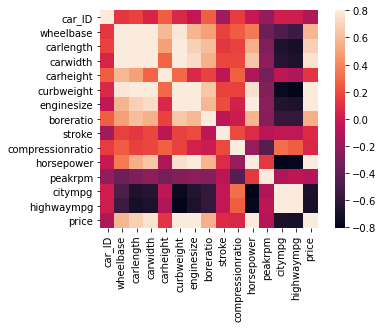

In [40]:
# Heatmap

sns.heatmap(cor, vmax=.8, square=True);

In [41]:
mask = np.array(cor)
mask

array([[ 1.        ,  0.12972878,  0.17063639,  0.05238661,  0.25596004,
         0.07196156, -0.03392984,  0.26006368, -0.16082362,  0.14747771,
        -0.01500557, -0.2037892 ,  0.01594004,  0.01125532, -0.10909334],
       [ 0.12972878,  1.        ,  0.87458748,  0.79514364,  0.58943476,
         0.77638633,  0.56932868,  0.48874988,  0.16095905,  0.25175191,
         0.35329448, -0.36046875, -0.47041361, -0.54408192,  0.5778156 ],
       [ 0.17063639,  0.87458748,  1.        ,  0.84111827,  0.49102946,
         0.87772846,  0.68335987,  0.60645436,  0.12953261,  0.16349906,
         0.55262297, -0.2872422 , -0.67090866, -0.7046616 ,  0.68292002],
       [ 0.05238661,  0.79514364,  0.84111827,  1.        ,  0.27921032,
         0.86703246,  0.7354334 ,  0.55914991,  0.18294169,  0.18304313,
         0.64073208, -0.2200123 , -0.64270434, -0.67721792,  0.7593253 ],
       [ 0.25596004,  0.58943476,  0.49102946,  0.27921032,  1.        ,
         0.29557173,  0.06714874,  0.17107092, 

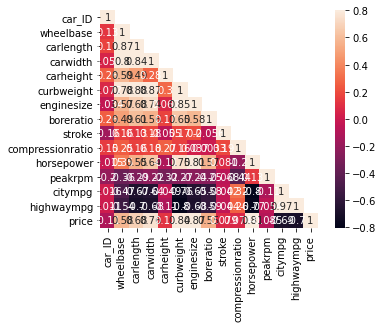

In [42]:
# Heatmap

mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(cor, mask=mask, vmax=.8, square=True, annot=True);

In [43]:
len(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'])

15

In [44]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [45]:
df.drop(['car_ID','enginesize'], axis=1, inplace=True)

In [46]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [47]:
df.head()

symboling                   CarName fueltype aspiration doornumber  \
0         F        alfa-romero giulia      gas        std        two   
1         F       alfa-romero stelvio      gas        std        two   
2         E  alfa-romero Quadrifoglio      gas        std        two   
3         F               audi 100 ls      gas        std       four   
4         F                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   cylindernumber  fuelsystem  boreratio stroke compressionratio horsepower  \
0            four        mpfi       3.47   2.68              9.0        111   
1            four        mpfi       3.47   2.68              9.0        111   
2             six        mpfi       2.68   3.47              9.0        154   
3            four        mpfi       3.19   3.40             10.0        102   
4            five        mpfi       3.19   3.40              8.0        115   

   peakrpm  citympg  highwaympg    price  
0     5000       21          27  13495.0  
1     5000       21          27  16500.0  
2     5000       19          26  16500.0  
3     5500       24          30  13950.0  
4     5500       18          22  17450.0  

[5 rows x 24 columns]

In [48]:
df_categorical.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [49]:
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

# In ur case, col are season, yr, mnth, holiday, weekday, workingday,weathersit

# After OHE, u will get 25 cols

symboling_B  symboling_C  symboling_E  symboling_F  \
0            0            0            0            1   
1            0            0            0            1   
2            0            0            1            0   
3            0            0            0            1   
4            0            0            0            1   

   CarName_alfa-romero Quadrifoglio  CarName_alfa-romero giulia  \
0                                 0                           1   
1                                 0                           0   
2                                 1                           0   
3                                 0                           0   
4                                 0                           0   

   CarName_alfa-romero stelvio  CarName_audi 100 ls  CarName_audi 100ls  \
0                            0                    0                   0   
1                            1                    0                   0   
2                            0                    0                   0   
3                            0                    1                   0   
4                            0                    0                   1   

   CarName_audi 4000  ...  cylindernumber_three  cylindernumber_twelve  \
0                  0  ...                     0                      0   
1                  0  ...                     0                      0   
2                  0  ...                     0                      0   
3                  0  ...                     0                      0   
4                  0  ...                     0                      0   

   cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
0                   0                0                0               0   
1                   0                0                0               0   
2                   0                0                0               0   
3                   0                0                0               0   
4                   0                0                0               0   

   fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  
0               0                1                0                0  
1               0                1                0                0  
2               0                1                0                0  
3               0                1                0                0  
4               0                1                0                0  

[5 rows x 179 columns]

In [50]:
df = df.drop(list(df_categorical.columns), axis=1)

In [51]:
df = pd.concat([df, df_dummies], axis=1)

In [52]:
df.head()

wheelbase  carlength  carwidth  carheight  curbweight  boreratio  stroke  \
0       88.6      168.8      64.1       48.8        2548       3.47    2.68   
1       88.6      168.8      64.1       48.8        2548       3.47    2.68   
2       94.5      171.2      65.5       52.4        2823       2.68    3.47   
3       99.8      176.6      66.2       54.3        2337       3.19    3.40   
4       99.4      176.6      66.4       54.3        2824       3.19    3.40   

   compressionratio  horsepower  peakrpm  ...  cylindernumber_three  \
0               9.0         111     5000  ...                     0   
1               9.0         111     5000  ...                     0   
2               9.0         154     5000  ...                     0   
3              10.0         102     5500  ...                     0   
4               8.0         115     5500  ...                     0   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                      0                   0                0   
1                      0                   0                0   
2                      0                   0                0   
3                      0                   0                0   
4                      0                   0                0   

   fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \
0                0               0               0                1   
1                0               0               0                1   
2                0               0               0                1   
3                0               0               0                1   
4                0               0               0                1   

   fuelsystem_spdi  fuelsystem_spfi  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 192 columns]

In [53]:
# df = pd.get_dummies(df, columns=[names of cat cols], drop_first=True)

In [54]:
df.head()

wheelbase  carlength  carwidth  carheight  curbweight  boreratio  stroke  \
0       88.6      168.8      64.1       48.8        2548       3.47    2.68   
1       88.6      168.8      64.1       48.8        2548       3.47    2.68   
2       94.5      171.2      65.5       52.4        2823       2.68    3.47   
3       99.8      176.6      66.2       54.3        2337       3.19    3.40   
4       99.4      176.6      66.4       54.3        2824       3.19    3.40   

   compressionratio  horsepower  peakrpm  ...  cylindernumber_three  \
0               9.0         111     5000  ...                     0   
1               9.0         111     5000  ...                     0   
2               9.0         154     5000  ...                     0   
3              10.0         102     5500  ...                     0   
4               8.0         115     5500  ...                     0   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                      0                   0                0   
1                      0                   0                0   
2                      0                   0                0   
3                      0                   0                0   
4                      0                   0                0   

   fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \
0                0               0               0                1   
1                0               0               0                1   
2                0               0               0                1   
3                0               0               0                1   
4                0               0               0                1   

   fuelsystem_spdi  fuelsystem_spfi  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 192 columns]

In [55]:
day.head()

instant      dteday  season  yr mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0  Jan        0        1           1   
1        2  02-01-2018       1   0  Jan        0        2           1   
2        3  03-01-2018       1   0  Jan        0        3           1   
3        4  04-01-2018       1   0  Jan        0        4           1   
4        5  05-01-2018       1   0  Jan        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [56]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
# Data preparation

In [57]:
X = df.drop('price', axis=1)
y = df.price

In [58]:
X.head()

wheelbase  carlength  carwidth  carheight  curbweight  boreratio  stroke  \
0       88.6      168.8      64.1       48.8        2548       3.47    2.68   
1       88.6      168.8      64.1       48.8        2548       3.47    2.68   
2       94.5      171.2      65.5       52.4        2823       2.68    3.47   
3       99.8      176.6      66.2       54.3        2337       3.19    3.40   
4       99.4      176.6      66.4       54.3        2824       3.19    3.40   

   compressionratio  horsepower  peakrpm  ...  cylindernumber_three  \
0               9.0         111     5000  ...                     0   
1               9.0         111     5000  ...                     0   
2               9.0         154     5000  ...                     0   
3              10.0         102     5500  ...                     0   
4               8.0         115     5500  ...                     0   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                      0                   0                0   
1                      0                   0                0   
2                      0                   0                0   
3                      0                   0                0   
4                      0                   0                0   

   fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \
0                0               0               0                1   
1                0               0               0                1   
2                0               0               0                1   
3                0               0               0                1   
4                0               0               0                1   

   fuelsystem_spdi  fuelsystem_spfi  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 191 columns]

In [59]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
X_train.shape

(164, 191)

In [62]:
num_feat = list(X_train.describe().columns)
num_feat

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'symboling_B',
 'symboling_C',
 'symboling_E',
 'symboling_F',
 'CarName_alfa-romero Quadrifoglio',
 'CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 4000',
 'CarName_audi 5000',
 'CarName_audi 5000s (diesel)',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw x4',
 'CarName_bmw x5',
 'CarName_bmw z4',
 'CarName_buick century',
 'CarName_buick century luxus (sw)',
 'CarName_buick century special',
 'CarName_buick electra 225 custom',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skyhawk',
 'CarName_buick skylark',
 'CarName_chevrolet impala',
 'CarName_chevrolet monte carlo',
 'CarName_chevrolet vega 2300',
 'CarName_dodge challenger se',
 'CarName_dod

In [63]:
# Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[num_feat] = sc.fit_transform(X_train[num_feat])
X_test[num_feat] = sc.transform(X_test[num_feat])

In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 4 to 172
Columns: 191 entries, wheelbase to fuelsystem_spfi
dtypes: float64(191)
memory usage: 246.0 KB


In [65]:
X_train.head()

wheelbase  carlength  carwidth  carheight  curbweight  boreratio  \
4     0.080148   0.170843  0.231129   0.202938    0.476114  -0.534810   
71    2.708992   2.321004  2.783826   1.087238    2.234449   0.458537   
134   0.031465   0.997828  0.279293   0.926456    0.251523  -2.926202   
145  -0.309311  -0.209570 -0.250512   0.202938   -0.126634   1.047187   
122  -0.844816  -0.598253 -1.021138  -1.203903   -0.738980  -1.344204   

       stroke  compressionratio  horsepower   peakrpm  ...  \
4    0.469827         -0.474859    0.286122  0.795251  ...   
71  -0.521615         -0.474859    1.341781 -0.750023  ...   
134 -3.925567         -0.242391    0.154165  0.280159  ...   
145 -2.041827         -0.707328    0.180556 -0.647005  ...   
122 -0.091991         -0.242391   -0.954277  0.795251  ...   

     cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
4                     0.0              -0.078326           -0.136505   
71                    0.0              -0.078326           -0.136505   
134                   0.0              -0.078326           -0.136505   
145                   0.0              -0.078326           -0.136505   
122                   0.0              -0.078326           -0.136505   

     fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
4          -0.690997        -0.111111       -0.361987       -0.078326   
71         -0.690997        -0.111111       -0.361987       -0.078326   
134        -0.690997        -0.111111       -0.361987       -0.078326   
145        -0.690997        -0.111111       -0.361987       -0.078326   
122         1.447183        -0.111111       -0.361987       -0.078326   

     fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  
4           1.144491        -0.226455        -0.078326  
71          1.144491        -0.226455        -0.078326  
134         1.144491        -0.226455        -0.078326  
145         1.144491        -0.226455        -0.078326  
122        -0.873751        -0.226455        -0.078326  

[5 rows x 191 columns]

In [66]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [67]:
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff

Coefficients
wheelbase       -1.993652e+03
carlength        3.649063e+02
carwidth         8.776447e+01
carheight        3.796014e+02
curbweight       1.051292e+04
...                       ...
fuelsystem_idi  -1.540007e+03
fuelsystem_mfi  -6.241280e+13
fuelsystem_mpfi -4.287584e+03
fuelsystem_spdi -2.722844e+03
fuelsystem_spfi  3.842739e+14

[191 rows x 1 columns]

In [68]:
regressor.intercept_

13304.492957450584

In [69]:
y_pred = regressor.predict(X_test)

In [70]:
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted': y_pred
})
df

Actual     Predicted
52    6795.0  6.075626e+14
181  15750.0  6.992711e+14
5    15250.0  4.685555e+15
18    5151.0 -6.109282e+15
188   9995.0  6.992711e+14
170  11199.0  6.992711e+14
76    5389.0  7.080479e+14
154   7898.0  6.992711e+14
104  17199.0  6.992711e+14
33    6529.0  4.792453e+15
12   20970.0 -3.523405e+15
129  31400.5 -5.012713e+15
55   10945.0 -2.719171e+03
66   18344.0  2.868872e+04
45    8916.5  9.171919e+14
169   9989.0  3.717655e+01
130   9295.0  6.992711e+14
7    18920.0  5.352150e+15
37    7895.0  6.328997e+03
152   6488.0  6.901567e+03
80    9959.0  8.502329e+03
111  15580.0  3.423552e+03
131   9895.0  6.992711e+14
171  11549.0  1.195561e+04
179  15998.0  1.828293e+04
138   5118.0  2.507442e+03
156   6938.0  8.061192e+03
113  16695.0  2.205516e+02
161   8358.0  5.616942e+03
89    5499.0  6.992711e+14
183   7975.0  6.992711e+14
193  12290.0  6.992711e+14
125  22018.0  6.992711e+14
173   8948.0  9.418802e+03
92    6849.0  6.777567e+03
16   41315.0  2.902184e+15
189  11595.0  2.523924e+14
136  18150.0  1.750218e+04
22    6377.0  6.320594e+14
74   45400.0  4.258256e+15
44    8916.5 -4.936180e+15

In [71]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-6.5186800471097446e+22

In [72]:
from sklearn import datasets
dataset = datasets.load_iris()

In [74]:
type(dataset)

sklearn.utils.Bunch

In [75]:
print(dataset)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [76]:
dataset.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [77]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [78]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [79]:
# RFE -> Recursive Feature Elimination

from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets
dataset = datasets.load_iris()
svm = LinearSVC()
rfe = RFE(svm, 3)
rfe = rfe.fit(dataset.data, dataset.target)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True]
[2 1 1 1]


In [80]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [81]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('wheelbase', False, 115),
 ('carlength', False, 129),
 ('carwidth', False, 133),
 ('carheight', False, 128),
 ('curbweight', False, 104),
 ('boreratio', False, 105),
 ('stroke', False, 110),
 ('compressionratio', False, 131),
 ('horsepower', False, 111),
 ('peakrpm', False, 112),
 ('citympg', False, 134),
 ('highwaympg', False, 122),
 ('symboling_B', False, 116),
 ('symboling_C', False, 124),
 ('symboling_E', False, 125),
 ('symboling_F', False, 123),
 ('CarName_alfa-romero Quadrifoglio', False, 16),
 ('CarName_alfa-romero giulia', False, 99),
 ('CarName_alfa-romero stelvio', False, 97),
 ('CarName_audi 100 ls', False, 29),
 ('CarName_audi 100ls', True, 1),
 ('CarName_audi 4000', True, 1),
 ('CarName_audi 5000', True, 1),
 ('CarName_audi 5000s (diesel)', True, 1),
 ('CarName_audi fox', True, 1),
 ('CarName_bmw 320i', False, 17),
 ('CarName_bmw x1', True, 1),
 ('CarName_bmw x3', True, 1),
 ('CarName_bmw x4', False, 3),
 ('CarName_bmw x5', True, 1),
 ('CarName_bmw z4', False, 7),
 ('Ca

In [83]:
X_train.columns[rfe.support_]

Index(['CarName_audi 100ls', 'CarName_audi 4000', 'CarName_audi 5000',
       'CarName_audi 5000s (diesel)', 'CarName_audi fox', 'CarName_bmw x1',
       'CarName_bmw x3', 'CarName_bmw x5', 'CarName_buick century',
       'CarName_buick century luxus (sw)', 'CarName_buick century special',
       'CarName_buick electra 225 custom',
       'CarName_buick regal sport coupe (turbo)', 'CarName_buick skyhawk',
       'CarName_chevrolet impala', 'CarName_dodge challenger se',
       'CarName_dodge coronet custom (sw)', 'CarName_honda accord cvcc',
       'CarName_isuzu D-Max ', 'CarName_isuzu D-Max V-Cross',
       'CarName_jaguar xf', 'CarName_mazda glc 4', 'CarName_mazda rx2 coupe',
       'CarName_mitsubishi mirage', 'CarName_peugeot 304',
       'CarName_peugeot 504', 'CarName_peugeot 504 (sw)',
       'CarName_peugeot 505s turbo diesel', 'CarName_peugeot 604sl',
       'CarName_subaru', 'CarName_subaru baja', 'CarName_subaru brz',
       'CarName_subaru dl', 'CarName_subaru r1', 'CarNam

In [84]:
len(X_train.columns[rfe.support_])

50

In [ ]:
# 93

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
X_train_new = build_model(X_train_rfe, y_train)

In [ ]:
checkVIF(X_train_new)